### Perceptron de Camada Única

Do inglês Singles Layer Perceptron (SLP), é uma das primeiras e mais antigas redes neurais criada. Foi proposta por Frank Rosenblatt em 1958. Por ser o tipo mais imples de rede neural, ela apenas classifica casos linearmente separáveis de forma binária. 

Uma SLP é uma rede de alimentação direta baseada em uma função de transferência. Essas funções são equações matemáticas que determinam a saída de uma rede neural.

Componentes do Perceptron:
- Input: entradas reais ou binárias;
- Peso: cada entrada é associada à um peso, representando o seu grau de importância;
- Bias: esse termo permite o neurônio ser ativado até quando a entrada é zero, mitigando o problema de _vanishing gradient_;
- Função de ativação: o perceptron usa uma função degrau para determinar se a soma do produto da entrada pelo peso, somado ao bias, está acima ou abaixo de um certo limite.

### Importando bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Função de treinamento

In [ ]:
def treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed):
    """
        Argumentos:
        X_train -- amostras de treino
        y_train -- resultados desejados das amostras de treino
        qtd_atributos -- quantidade de features
        tx_aprendizagem -- taxa de aprendizado da rede
        epocas -- cada apresentação completa de todas as amostras pertencentes ao subconjunto de treinamento
        seed -- para garantir que sempre será utilizado o mesmo número aleatório
        
        Saída:
        parâmetros -- python dict:
                        peso aprendido -- pesos aprendidos ao final do treinamento
                        epocas executadas -- quantidade total de épocas ao final do treinamento
                        evolucao do erro -- lista contendo a evolução do erro ao longo das épocas
                        acuracia -- relação entre o total de acertos e o total de amostras
    """

    np.random.seed(seed)

    pesos = np.random.uniform(low=-0.5, high=0.5, size=((qtd_atributos + 1),))  # vetor de peso (atributos + bias)
    eta = tx_aprendizagem                                                       # taxa de aprendizagem
    epoca = 0                                                                   # contador de epoca
    evolucao_erro = []

    while epoca < epocas:
        erro = 0
        acertos = 0

        for i in range(len(X_train)):
            x_amostra = X_train[i].flatten()
            x = np.concatenate(([1], x_amostra))                # adiciona o bias em uma amostra
            y_desejado = y_train[i].flatten()

            u = np.dot(pesos, x)                                # potencial de ativação (produto escalar)

            if u >= 0:                                          # função de ativação -> y_pred = sinal(u)
                y_pred = 1
            else:
                y_pred = -1

            if y_pred != y_desejado:                            # regra de aprendizado de Hebb
                pesos = pesos + eta * (y_desejado - y_pred) * x
                erro += 1
            else:
                acertos += 1

        evolucao_erro.append(erro/len(X_train))     # evolução do erro ao longo das épocas

        epoca += 1

        if erro == 0:
            break
    
    return {
        "peso aprendido": pesos,
        "epocas executadas": epoca,
        "evolucao do erro": evolucao_erro,
        "acuracia": acertos/len(X_train)
    }
                

### Função de teste

In [5]:
def teste(X_test, y_test, peso):
    """
        Argumentos:
        X_test -- amostras de teste
        y_test -- resultados desejados das amostras de teste
        peso -- pesos aprendidos durante o treinamento
        
        Saída:
        parâmetros -- python dict:
                        acuracia -- relação entre o total de acertos e o total de amostras
    """

    acertos = 0                                 # contador de acertos
    
    for i in range(len(X_test)):
        x_amostra = X_test[i].flatten()
        x = np.concatenate(([1], x_amostra))    # adiciona o bias em uma amostra
        y_desejado = y_test[i].flatten()

        u = np.dot(x, peso)                     # potencial de ativação com base no peso aprendido

        if u >= 0:                              # função de ativação -> y_pred = sinal(u)
            y_pred = 1
        else:
            y_pred = -1

        if y_pred == y_desejado:
            acertos += 1

    return {
        "acuracia": acertos/len(X_test)
    }

### Dataset #1

##### Carregando os arquivos CSV

In [38]:
# Carregando os datasets
df_train_loaded = pd.read_csv("arquivos_csv/train_dataset1.csv")
df_test_loaded = pd.read_csv("arquivos_csv/test_dataset1.csv")


# Separando os dados de treinamento
X_train = df_train_loaded.drop("label", axis=1).values      # (n_features, n_amostras)
y_train = df_train_loaded["label"].values.reshape(1, -1).T    # (1, n_amostras)

# Separando os dados de teste
X_test = df_test_loaded.drop("label", axis=1).values
y_test = df_test_loaded["label"].values.reshape(1, -1).T

##### Analisando o dataset

In [7]:
# Tamanho do dataset
print("Dataset de treino: ", df_train_loaded.shape)
print("Dataset de teste: ", df_test_loaded.shape)

Dataset de treino:  (140, 3)
Dataset de teste:  (60, 3)


In [46]:
# Razão de treino e teste
print("Razão de treino: ", df_train_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))
print("Razão de teste: ", df_test_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


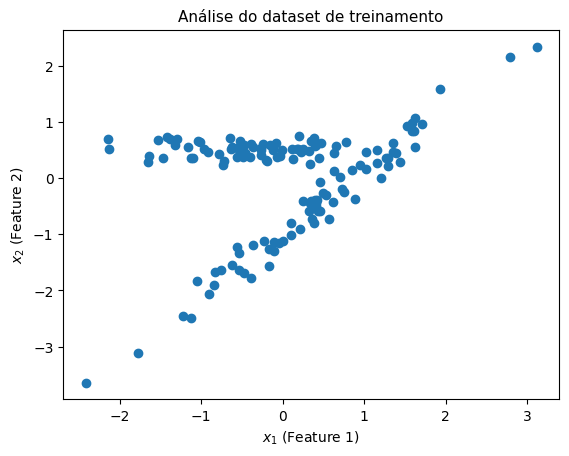

In [108]:
# Plot dos dados de treinamento
X_train_T = X_train.T
plt.scatter(X_train_T[0], X_train_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de treinamento", fontsize=11)
plt.show()

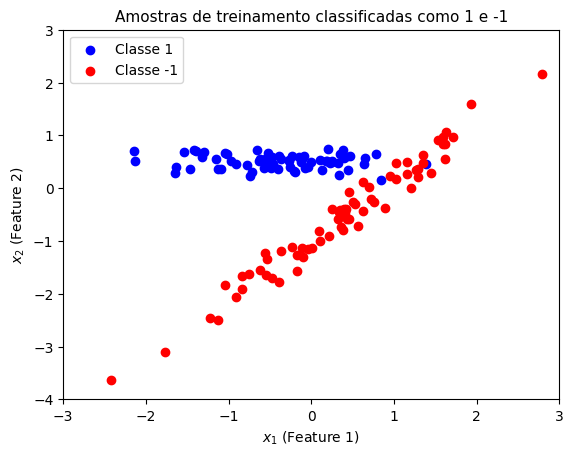

In [107]:
df_classe_1 = df_train_loaded[df_train_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_train_loaded[df_train_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_treino = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_treino = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de treinamento classificadas como 1 e -1", fontsize=11)
plt.xlim(-3, 3)
plt.ylim(-4, 3)
plt.legend()
plt.show()

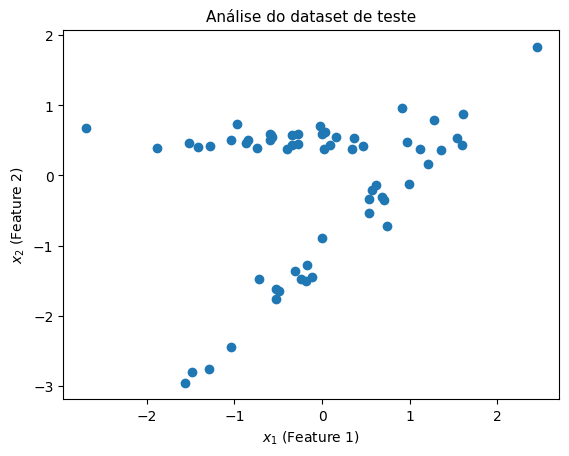

In [106]:
# Plot dos dados de teste
X_test_T = X_test.T
plt.scatter(X_test_T[0], X_test_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de teste", fontsize=11)
plt.show()

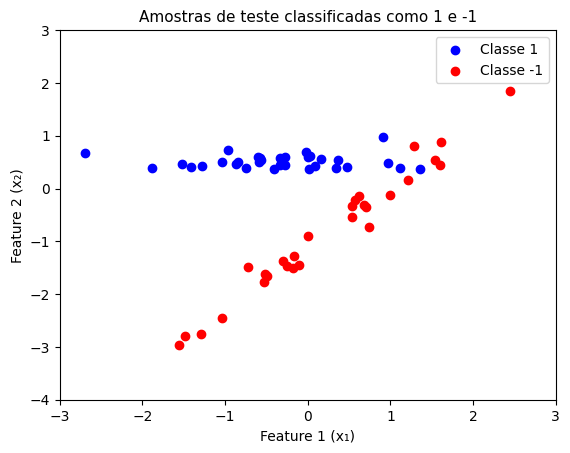

In [ ]:
df_classe_1 = df_test_loaded[df_test_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_test_loaded[df_test_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_teste = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_teste = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de teste classificadas como 1 e -1", fontsize=11)
plt.xlim(-3, 3)
plt.ylim(-4, 3)
plt.legend()
plt.show()

##### Treinando o Perceptron

In [82]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.1
epocas = 100
seed = 16

resultado_treino = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
resultado_treino

{'peso aprendido': array([ 0.52329108, -1.65293362,  1.55791257]),
 'epocas executadas': 100,
 'evolucao do erro': [0.12857142857142856,
  0.06428571428571428,
  0.07142857142857142,
  0.02857142857142857,
  0.04285714285714286,
  0.02857142857142857,
  0.02142857142857143,
  0.02857142857142857,
  0.05714285714285714,
  0.03571428571428571,
  0.04285714285714286,
  0.03571428571428571,
  0.02857142857142857,
  0.06428571428571428,
  0.03571428571428571,
  0.02857142857142857,
  0.05714285714285714,
  0.05,
  0.03571428571428571,
  0.02142857142857143,
  0.06428571428571428,
  0.02142857142857143,
  0.03571428571428571,
  0.03571428571428571,
  0.02857142857142857,
  0.02857142857142857,
  0.03571428571428571,
  0.02142857142857143,
  0.02857142857142857,
  0.05714285714285714,
  0.03571428571428571,
  0.02142857142857143,
  0.03571428571428571,
  0.04285714285714286,
  0.02142857142857143,
  0.06428571428571428,
  0.02142857142857143,
  0.03571428571428571,
  0.02857142857142857,
  0.

##### Testando o Perceptron

In [81]:
resultado_teste = teste(X_test, y_test, resultado_treino["peso aprendido"])
resultado_teste

{'acuracia': 0.95}

##### Evolução do erro de treinamento em função das épocas

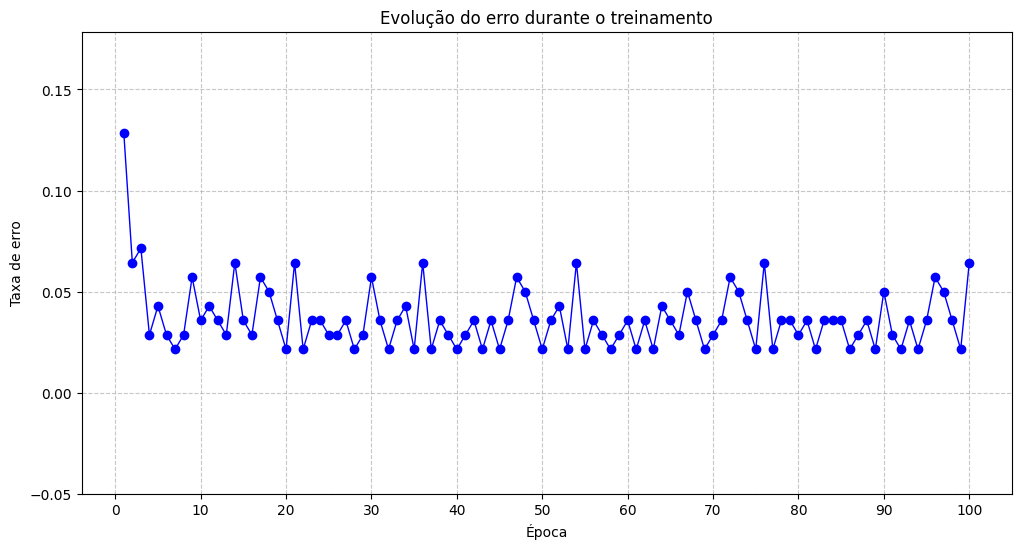

In [44]:
x = np.array(range(1, resultado_treino["epocas executadas"] + 1))
y = resultado_treino["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(-0.05, min(1.05, max(y)+0.05))
plt.show()

##### Fronteira de decisão

É a reta que separa as duas classes classificadas pelo Perceptron.

Como temos dois atributos ($x_{1}$ e $x_{2}$), logo o potencial de ativação é dado por $u = x_{1} * w_{1} + x_{2} * w_{2} - \theta$. Asssumindo $x_{1}$ como $x$ e $x_{2}$ como $y$, a equação se parecerá com a equação geral da reta, dada por $A_{x} + B_{y} + C = 0$. Assim, podemos reordenar os termos e isolar $x_{2}$, obtendo $x_{2}$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x_{1}$ ou $y$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x$.

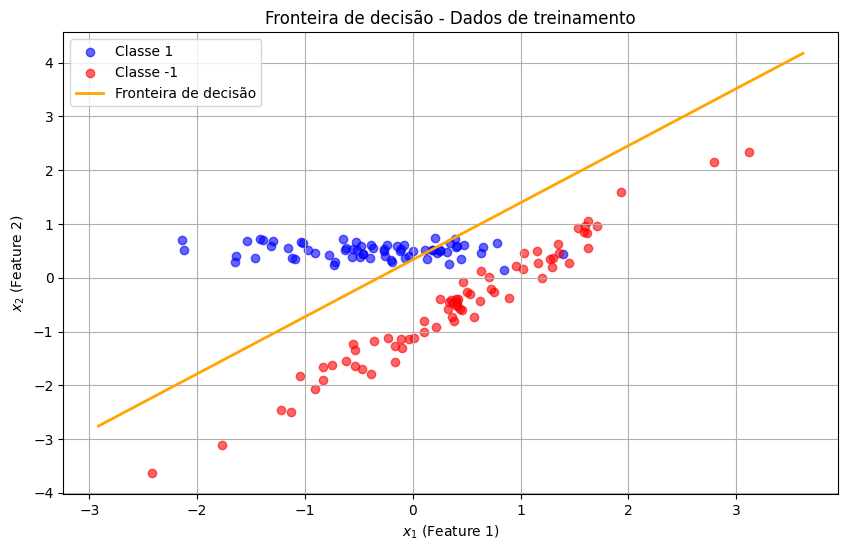

In [ ]:
# Fronteira de decisão dos dados de treinamento
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de treinamento')
plt.legend()
plt.grid(True)
plt.show()

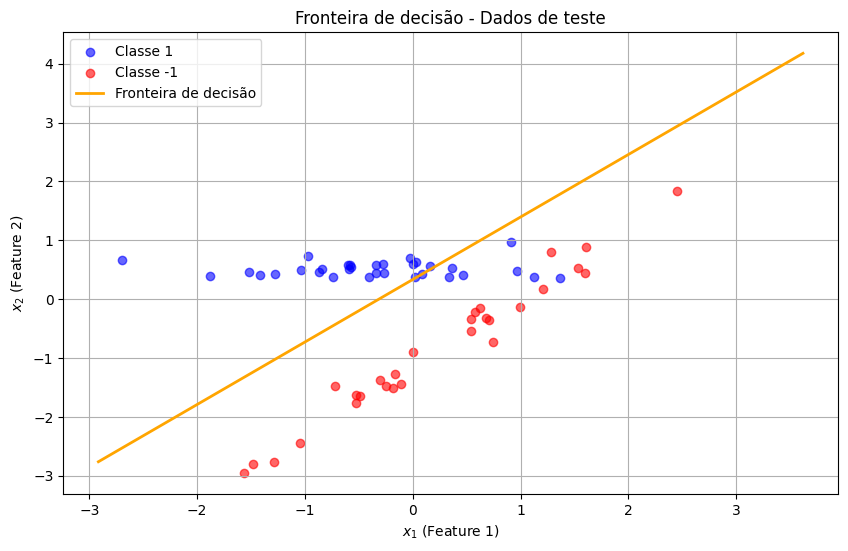

In [ ]:
# Fronteira de decisão dos dados de teste
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de teste')
plt.legend()
plt.grid(True)
plt.show()

##### Resultados observados

- Tanto as amostras de treino quanto as de teste não são linearmente separáveis;
- Algumas amostras da Classe 1 estão "misturadas" nas amostras da Classe -1, podendo ser outliers;
- A razão de treinamento foi de 70% de dados de treino e 30% de dados de teste;
- O treinamento começou com ~13% de taxa de erro, variou bastante ao longo das épocas, mas finalizou com ~6% de taxa de erro;
- A acurácia dos dados de teste é ligeiramente maior porque, como a amostra de teste tem menos dados da Classe 1 que estão "misturados" com os dados da Classe -1, a relação entre acerto e total de amostra acaba sendo maior;
- De modo geral a rede atingiu bons resultados.

### Dataset #2

##### Carregando os arquivos CSV

In [120]:
# Carregando os datasets
df_train_loaded = pd.read_csv("arquivos_csv/train_dataset2.csv")
df_test_loaded = pd.read_csv("arquivos_csv/test_dataset2.csv")


# Separando os dados de treinamento
X_train = df_train_loaded.drop("label", axis=1).values      # (n_features, n_amostras)
y_train = df_train_loaded["label"].values.reshape(1, -1).T    # (1, n_amostras)

# Separando os dados de teste
X_test = df_test_loaded.drop("label", axis=1).values
y_test = df_test_loaded["label"].values.reshape(1, -1).T

##### Analisando o dataset

In [ ]:
# Tamanho do dataset
print("Dataset de treino: ", df_train_loaded.shape)
print("Dataset de teste: ", df_test_loaded.shape)

Dataset de treino:  (175, 3)
Dataset de teste:  (75, 3)


In [122]:
# Razão de treino e teste
print("Razão de treino: ", df_train_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))
print("Razão de teste: ", df_test_loaded.shape[0]/(df_train_loaded.shape[0] + df_test_loaded.shape[0]))

Razão de treino:  0.7
Razão de teste:  0.3


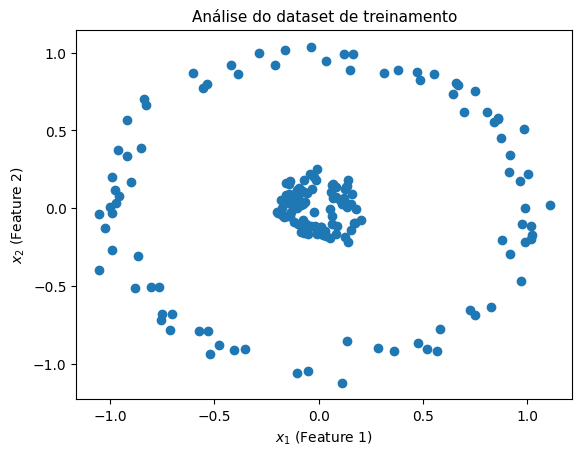

In [123]:
# Plot dos dados de treinamento
X_train_T = X_train.T
plt.scatter(X_train_T[0], X_train_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de treinamento", fontsize=11)
plt.show()

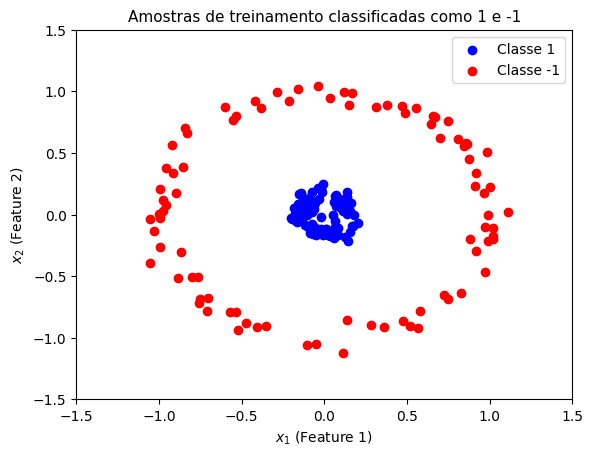

In [126]:
df_classe_1 = df_train_loaded[df_train_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_train_loaded[df_train_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_treino = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_treino = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de treinamento classificadas como 1 e -1", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

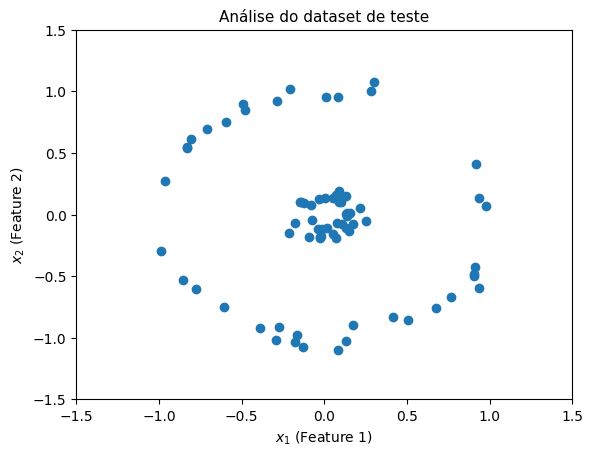

In [128]:
# Plot dos dados de teste
X_test_T = X_test.T
plt.scatter(X_test_T[0], X_test_T[1])
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Análise do dataset de teste", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

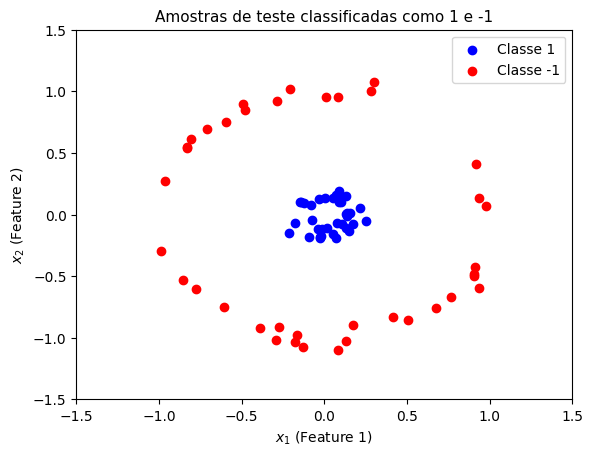

In [130]:
df_classe_1 = df_test_loaded[df_test_loaded['label'] == 1]            # amostras da classe 1
df_classe_menos_1 = df_test_loaded[df_test_loaded['label'] == -1]     # amostras da classe -1

X_classe_1_teste = df_classe_1.drop("label", axis=1).values.T                 # (n_features, n_amostras)
X_classe_menos_1_teste = df_classe_menos_1.drop("label", axis=1).values.T     # (n_features, n_amostras)

plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1')
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title("Amostras de teste classificadas como 1 e -1", fontsize=11)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

##### Treinando o Perceptron

In [131]:
qtd_atributos = X_train.shape[1]
tx_aprendizagem = 0.1
epocas = 100
seed = 16

resultado_treino = treinamento(X_train, y_train, qtd_atributos, tx_aprendizagem, epocas, seed)
resultado_treino

{'peso aprendido': array([ 0.12329108,  0.2356349 , -0.05785355]),
 'epocas executadas': 100,
 'evolucao do erro': [0.5142857142857142,
  0.5142857142857142,
  0.5028571428571429,
  0.5257142857142857,
  0.5142857142857142,
  0.5371428571428571,
  0.5142857142857142,
  0.5142857142857142,
  0.5257142857142857,
  0.5028571428571429,
  0.5371428571428571,
  0.5371428571428571,
  0.5485714285714286,
  0.5142857142857142,
  0.5257142857142857,
  0.5257142857142857,
  0.5371428571428571,
  0.5371428571428571,
  0.5142857142857142,
  0.5257142857142857,
  0.5142857142857142,
  0.49142857142857144,
  0.5142857142857142,
  0.5142857142857142,
  0.5371428571428571,
  0.5257142857142857,
  0.5371428571428571,
  0.5371428571428571,
  0.5257142857142857,
  0.5371428571428571,
  0.5142857142857142,
  0.5257142857142857,
  0.5142857142857142,
  0.5257142857142857,
  0.5028571428571429,
  0.5142857142857142,
  0.5257142857142857,
  0.5142857142857142,
  0.5028571428571429,
  0.5028571428571429,
  0.5

##### Testando o Perceptron

In [133]:
resultado_teste = teste(X_test, y_test, resultado_treino["peso aprendido"])
resultado_teste

{'acuracia': 0.64}

##### Evolução do erro de treinamento em função das épocas

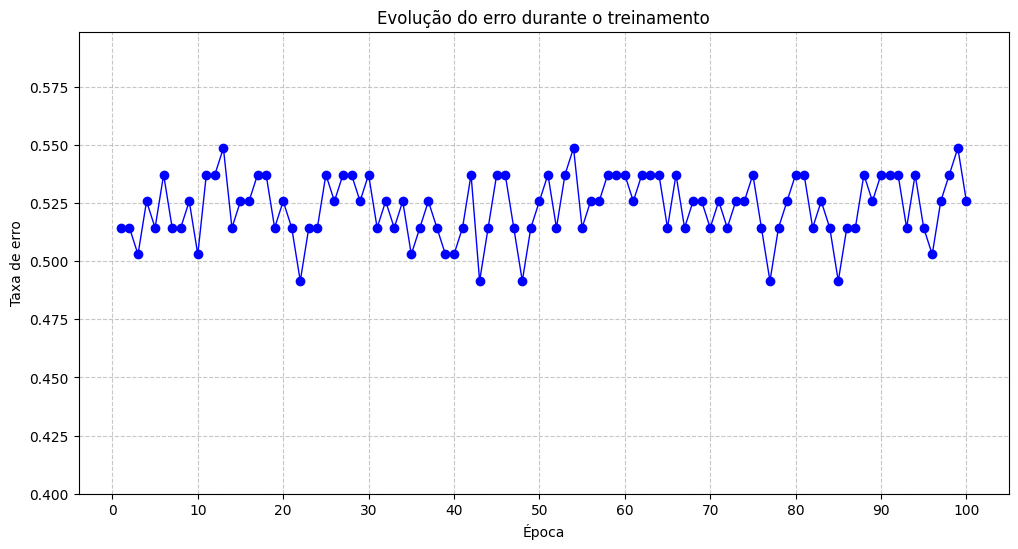

In [136]:
x = np.array(range(1, resultado_treino["epocas executadas"] + 1))
y = resultado_treino["evolucao do erro"]

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'b-o', linewidth=1, markersize=5, markeredgewidth=2)
plt.title('Evolução do erro durante o treinamento', fontsize=12)
plt.xlabel('Época', fontsize=10)
plt.ylabel('Taxa de erro', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, max(x)+1, max(1, len(x)//10)))
plt.ylim(0.4, min(1.05, max(y)+0.05))
plt.show()

##### Fronteira de decisão

É a reta que separa as duas classes classificadas pelo Perceptron.

Como temos dois atributos ($x_{1}$ e $x_{2}$), logo o potencial de ativação é dado por $u = x_{1} * w_{1} + x_{2} * w_{2} - \theta$. Asssumindo $x_{1}$ como $x$ e $x_{2}$ como $y$, a equação se parecerá com a equação geral da reta, dada por $A_{x} + B_{y} + C = 0$. Assim, podemos reordenar os termos e isolar $x_{2}$, obtendo $x_{2}$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x_{1}$ ou $y$ = $\frac{\theta}{w_{2}} - \frac{w_{1}}{w_{2}}x$.

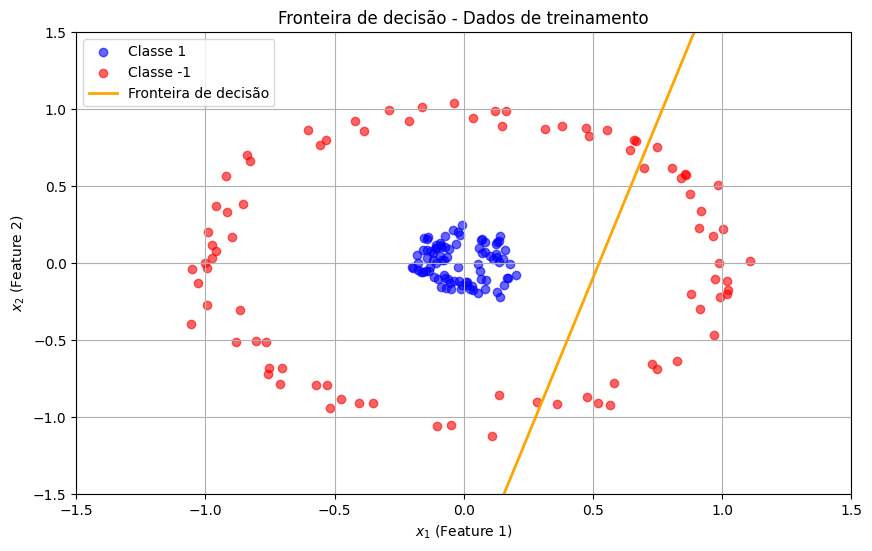

In [138]:
# Fronteira de decisão dos dados de treinamento
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_treino[0], X_classe_1_treino[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_treino[0], X_classe_menos_1_treino[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de treinamento')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

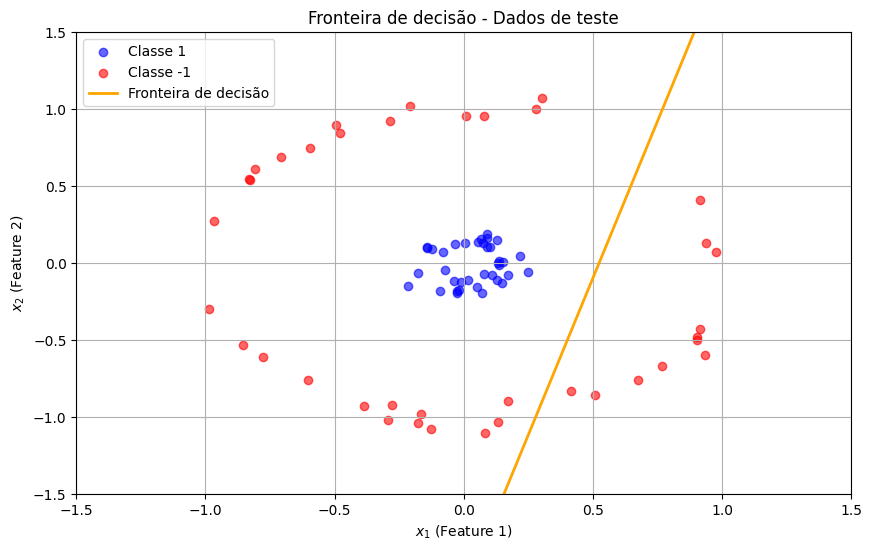

In [140]:
# Fronteira de decisão dos dados de teste
w1 = resultado_treino["peso aprendido"][1]
w2 = resultado_treino["peso aprendido"][2]
theta = resultado_treino["peso aprendido"][0]

x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()   # pega os pontos de mínimo e máximo
x1 = np.linspace(x1_min - 0.5, x1_max + 0.5, 100)           # pega 100 pontos dentro do mínimo e máximo
x2 = (theta / w2) - (w1 / w2) * x1                          # equação da fronteira de decisão

plt.figure(figsize=(10, 6))
plt.scatter(X_classe_1_teste[0], X_classe_1_teste[1], color='blue', label='Classe 1', alpha=0.6)
plt.scatter(X_classe_menos_1_teste[0], X_classe_menos_1_teste[1], color='red', label='Classe -1', alpha=0.6)
plt.plot(x1, x2, 'orange', linewidth=2, label='Fronteira de decisão')
plt.xlabel('$x_1$ (Feature 1)', fontsize=10)
plt.ylabel('$x_2$ (Feature 2)', fontsize=10)
plt.title('Fronteira de decisão - Dados de teste')
plt.legend()
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

##### Resultados observados

- Apesar das classes estarem perfeitamente separadas, são círculos concêntricos, tornando as amostras não linearmente separáveis;
- A razão de treinamento foi de 70% de dados de treino e 30% de dados de teste;
- O treinamento começou com ~51% de taxa de erro, variou bastante ao longo das épocas, mas finalizou com ~52,5% de taxa de erro, ou seja, o modelo não conseguiu aprender nada durante as épocas;
- A acurácia de treino de ~50% representa um "chute" que o modelo fez;
- A acurácia de teste foi de 64%, o que pode representar uma divisão errada entre treino e teste ou é simplesmente porque não existe tantas amostras próximas à fronteira.

### Referências

- Slides apresentados pelo docente durante as aulas;
- https://urialmog.medium.com/the-perceptron-61052ed85105;
- https://pyimagesearch.com/2021/05/06/implementing-the-perceptron-neural-network-with-python/;
- https://www.w3schools.com/python/matplotlib_plotting.asp;
- https://www.w3schools.com/python/python_ml_scatterplot.asp;
- https://www.w3schools.com/python/python_dictionaries.asp;
- https://pt.stackoverflow.com/questions/423668/qual-%C3%A9-a-diferen%C3%A7a-entre-utilizar-e-no-python;
- https://www.w3schools.com/python/python_lists_change.asp;
- https://stackoverflow.com/questions/40172073/check-one-arrays-elements-contains-in-another-array/40172317;
- https://www.w3schools.com/python/ref_list_append.asp;
- https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe;
- https://www.geeksforgeeks.org/python-generate-random-numbers-within-a-given-range-and-store-in-a-list/;
- https://stackoverflow.com/questions/52991675/how-to-specify-a-random-seed-while-using-pythons-numpy-random-choice;
- https://thomascountz.com/2018/04/13/calculate-decision-boundary-of-perceptron#:~:text=A%20perceptron%20is%20more%20specifically,that%20line%20a%20decision%20boundary;
- https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron;